How Earth going on
===
Numerical Analysis
---
1. Oil consumption grows?
2. Which country's CO2 omissions is largest?

Experiments
---
1. Global Temperture Changes
   - what happend in recent half century and future prediction
2. CO$_2$ emissions by Countries and Prediction
3. Renues by Carbon Tax
4. Production and Comsumption of Power Supply
5. LLM, To be or not to be ?

In [1]:
import pandas as pd
from prophet import Prophet

In [7]:
df=pd.read_csv("2023-2-Python/data/GlobalLandTemperatures/GlobalTemperatures.csv")

In [8]:
df.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [9]:
# data: https://github.com/DovarFalcone/global-temp-change-animation?tab=readme-ov-file
# from https://www.kaggle.com/datasets/mdazizulkabirlovlu/all-countries-temperature-statistics-1970-2021
# oil, https://ourworldindata.org/grapher/annual-change-oil

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import imageio.v2 as imageio
import itertools
import numpy as np

In [11]:
spinner = itertools.cycle(['-', '/', '|', '\\'])

# Read the datasets
df = pd.read_csv('data/iso3change.csv')
world_temp = pd.read_csv('data/worldtemp.csv', index_col=0)

# Extract the world average change for each year
world_avg_change = world_temp.loc['world', df.columns[1:]].values

# Melt the dataframe to long format
df_melted = df.melt(id_vars=['iso3'], var_name='year', value_name='change_index')

# Read the world map shapefile using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


/var/folders/xb/s7vwrt4153xbxzr8hc8tbdtr0000gn/T/ipykernel_9130/1944858741.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [44]:
# Loop over each year and create the corresponding map
images = []
i=1
for year in df.columns[1:]:
    print(f"\r{next(spinner)} Running year {year}...", end="")
    # Merge the map with the dataset for the current year
    merged = world.merge(df_melted[df_melted['year']==year], left_on='iso_a3', right_on='iso3', how='left')
    
    # Plot the map for the current year
    fig, ax = plt.subplots(figsize=(10, 5), facecolor='#2c2c2c')
    merged.plot(column='change_index', cmap='coolwarm', edgecolor='grey',vmin=-2, vmax=2, ax=ax)
    
    # Get the current world average temperature change for the year
    world_avg_temp = world_temp.loc['world', year]    
    
    ax.axis('off')
    ax.set_title(f'Global Surface Temperature Change ({year}), Increse: {world_avg_temp:.2f} ºC', color='white')
    # Add color bar to the plot
    cax = fig.add_axes([0.2, 0.15, 0.6, 0.02]) # [left, bottom, width, height]
    im = ax.collections[0]
    cb = plt.colorbar(im, cax=cax, orientation='horizontal', label='Global Average Change')
    cb.ax.xaxis.label.set_color('white')  # set the color of the label to white
    cb.ax.tick_params(colors='white')
    
    # Add a marker on the color bar for the world average temperature change
    cb.ax.plot([world_avg_temp], [1.5], 'v', color='grey', markeredgecolor='black', markersize=20)
    #map_for_date.plot(column='value', cmap='coolwarm', linewidth=0.1, 
    #              ax=ax, edgecolor='grey', legend=True, vmin=-25, 
    #              vmax=35, missing_kwds={'color': 'lightgrey', 'hatch': '///'})

    
    cb.ax.axvline(world_avg_temp, color='black', lw=1.5)
    cb.ax.annotate(f'{world_avg_temp:.2f}', xy=(world_avg_temp, 1.5), xytext=(world_avg_temp, 1.7),
                   fontsize=8, ha='center', va='center',
                   arrowprops=dict(arrowstyle='->', color='black', lw=0.5))
    
    # Set the title below the color bar
    plt.suptitle(f'Celsius', fontsize=8, y=0.05, color='white')
    
    # Save the map as an image file
    filename = f'./images/{year}.png'
    plt.savefig(filename, dpi=300)
    images.append(imageio.imread(filename))
    plt.close()
    i+=1
# Create the animated gif from the images

/ Running year 2021...

In [45]:
%time
# Create the animated gif from the images
imageio.mimsave('./gif/temperature_change_FINAL.gif', images, fps=1.75)


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs


<img src="./gif/temperature_change_FINAL.gif" width="750" align="center">

In [48]:
temp_df=world_temp.T

In [72]:
temp_df.rename(columns={'world':'change'},inplace=True)

In [ ]:
temp_df['sign']=np.sign(temp_df['change'].diff())

In [149]:
temp_df.fillna(1,inplace=True)

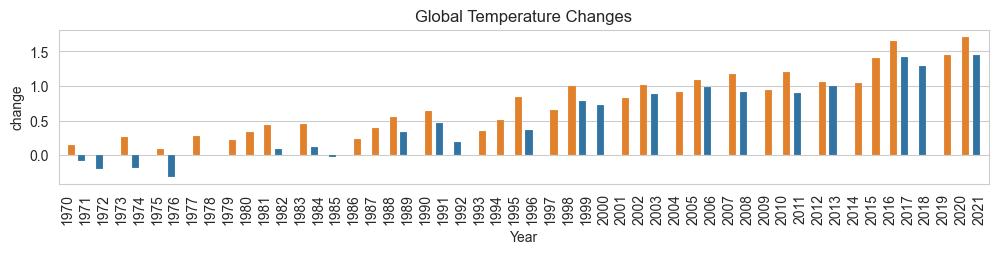

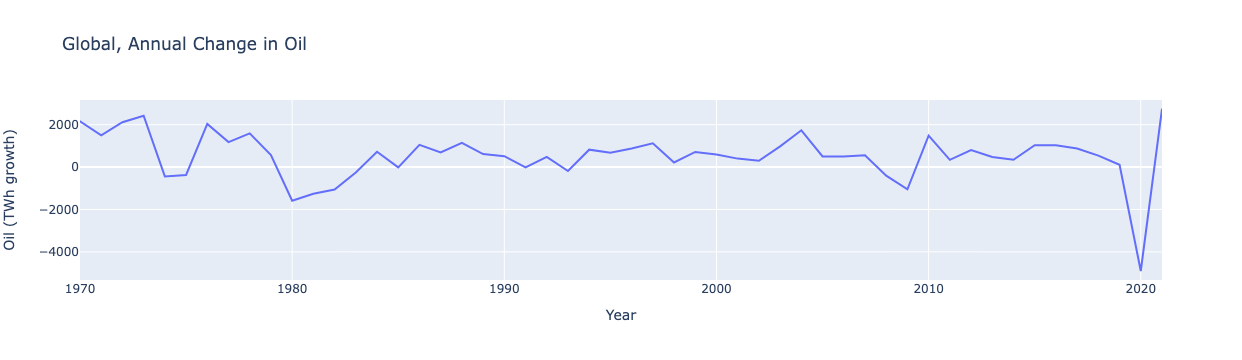

In [203]:
# https://ourworldindata.org/grapher/annual-change-oil
# Load the oil data
df_oil = pd.read_csv("data/annual-change-oil.csv")

# Filter the data for the 'World' entity
world_df = df_oil[df_oil['Entity'] == 'World']

# Create the Plotly figure for oil
fig_oil = go.Figure()
fig_oil.add_trace(go.Scatter(x=world_df['Year'], y=world_df['Oil (TWh growth)']))

# Update the layout for oil
fig_oil.update_layout(
    title='Global, Annual Change in Oil',
    xaxis_title='Year',
    yaxis_title='Oil (TWh growth)',
    xaxis_range=[1970, 2021]
)

# Load the temperature data


# Create the Seaborn barplot for temperature
plt.subplots(figsize=(12, 2))
plt.xticks(rotation=90)
sns.barplot(data=temp_df,x=temp_df.index, y="change", hue='sign',linewidth=0.1).set(title='Global Temperature Changes')
plt.legend('', frameon=False);
plt.show()

# Display the oil plot
fig_oil.show()

In [228]:
temp_df['Oil (TWh growth)']=world_df[world_df['Entity']=='World'][-53:-1]['Oil (TWh growth)'].values

In [ ]:
xlabels=np.linspace(1970,2022,53).astype(int)
# 1. Remove the first digits for each year, except 2000
modified_xlabels = [str(x)[-2:] if x != 2000 else '00' for x in xlabels]

# 2. Replace with '' if the year cannot be divided by 5
modified_xlabels = [str(x) if x % 5 == 0 else '' for x in xlabels]
modified_xlabels[:-1]

/var/folders/xb/s7vwrt4153xbxzr8hc8tbdtr0000gn/T/ipykernel_9130/1482016900.py:16: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



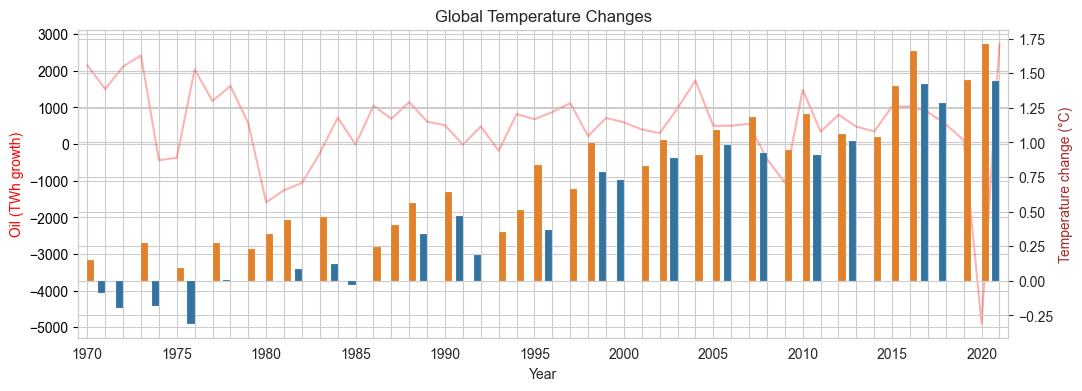

In [288]:

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 4))
plt.title('Global Temperature Changes')
# Plot the oil data
sns.lineplot(data= temp_df, x='Year', y='Oil (TWh growth)', ax=ax1,color='red',alpha=0.3)
#ax1.set_xlabel('Year')
ax1.set_ylabel('Oil (TWh growth)', color='red')
ax1.tick_params('y', colors='black')

# Create the secondary y-axis for the temperature data
ax2 = ax1.twinx()

# Plot the temperature data
#ax2.set_label('Year')

ax2.set_xticklabels(modified_xlabels[:-1], rotation=90)
#fig.set_xticklabels(temp_df.index.values, rotation=45, ha='right')

ax2=sns.barplot(data=temp_df,x=temp_df.index, y="change", hue='sign',linewidth=0.1)

plt.legend('', frameon=False);
ax2.set_ylabel('Temperature change (°C)', color='brown')
ax2.set_xticklabels(modified_xlabels[:-1], color='red')

plt.show()

In [261]:
temp_df.corr()

world,change,sign,Oil (TWh growth)
world,,,
change,1.000000,0.252351,-0.183764
sign,0.252351,1.000000,-0.145812
Oil (TWh growth),-0.183764,-0.145812,1.000000


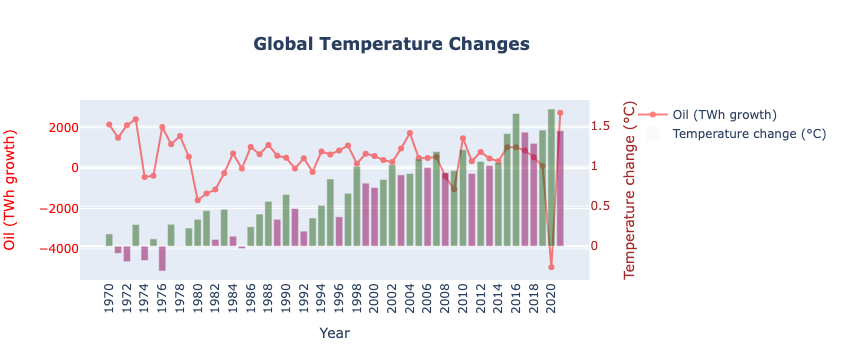

In [371]:
from plotly.subplots import make_subplots

# Assuming the data is in a Pandas DataFrame called 'temp_df'
#fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Create the left y-axis
lx = list(temp_df.index)
fig.add_trace(go.Scatter(x=lx, y=temp_df['Oil (TWh growth)'], mode='lines+markers',
    line=dict(color='red', width=2,), name='Oil (TWh growth)',opacity=0.5),
    secondary_y=False,)

# Create the right y-axis
fig.add_trace(go.Bar(x=lx, y=temp_df['change'], name='Temperature change (°C)', opacity=0.5,
                     marker=dict(color=temp_df['sign'])), secondary_y=True)


fig.update_yaxes(title_text="Oil (TWh growth)", color='red',  secondary_y=False)
fig.update_yaxes(title_text="Temperature change (°C)", color='brown', secondary_y=True)

# Set the title and x-axis label
fig.update_layout(
    title='<b>Global Temperature Changes</b>',
    title_x=0.3,
    xaxis_title='Year',
    xaxis_tickangle=-90
)

# Display the plot
fig.show()

In [ ]:
# 2022: 0.89, 2023:1.18
#             2023:

In [324]:
df_oil.tail()

,Entity,Code,Year,Oil (TWh growth)
5604,World,OWID_WRL,2018,538.67580
5605,World,OWID_WRL,2019,107.70703
5606,World,OWID_WRL,2020,-4903.19900
5607,World,OWID_WRL,2021,2740.01170
5608,World,OWID_WRL,2022,1619.93360


In [ ]:
temp_df.tail()

Meta *Prophet*,
===
$$
y(t)=Trend(t)+Season(t)+Holiday(t)+Error(t)
$$



A simplest Tool for Time-Series data Analysis
---
1. load data:
   - datetime feature: `ds` named;
   - target featured: 'y' named.
2. create model, `(fine-tuning)`, fit, and predict

Demo
---   
```python
# without parameter fine-tuning
df=pd.read_csv("data.csv")
df_p=df[['ds','y']].copy()

model = Prophet()
model.fit(df_p)

future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)
```

In [331]:
df_p=pd.DataFrame()
df_p['ds']=list(temp_df.index)
df_p['y']=temp_df['change'].values

In [332]:
df_p

,ds,y
0,1970,0.153
1,1971,-0.089
2,1972,-0.193
3,1973,0.271
4,1974,-0.179
...,...,...
47,2017,1.424
48,2018,1.284
49,2019,1.449
50,2020,1.713


In [333]:
# save data
df_p.to_csv('data/pred_climate.csv', index=False)

In [336]:
import pandas as pd
from prophet import Prophet

# Load the data

# Prepare the data for Prophet
df_p.columns = ['ds', 'y']
df_p['ds'] = pd.to_datetime(df_p['ds'], format='%Y')

# Create the Prophet model
model = Prophet()

# Fit the model
model.fit(df_p)

# Make predictions for the next 10 years
future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)

# Print the forecast
print(forecast[['ds', 'yhat']].tail(10))

20:39:50 - cmdstanpy - INFO - Chain [1] start processing
20:39:50 - cmdstanpy - INFO - Chain [1] done processing


           ds      yhat
52 2021-12-31  1.362710
53 2022-12-31  1.313928
54 2023-12-31  1.247462
55 2024-12-31  1.519802
56 2025-12-31  1.488838
57 2026-12-31  1.440057
58 2027-12-31  1.373591
59 2028-12-31  1.645931
60 2029-12-31  1.614967
61 2030-12-31  1.566185


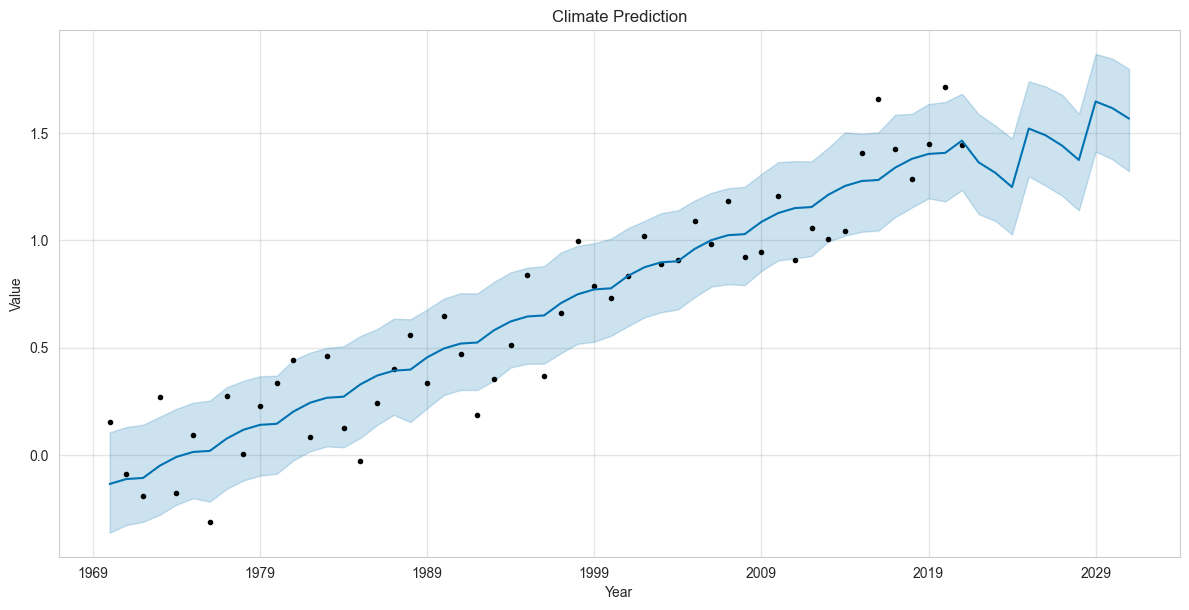

In [337]:
fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)
ax.set_title('Climate Prediction')
ax.set_xlabel('Year')
ax.set_ylabel('Value')
plt.show()

20:43:32 - cmdstanpy - INFO - Chain [1] start processing
20:43:32 - cmdstanpy - INFO - Chain [1] done processing


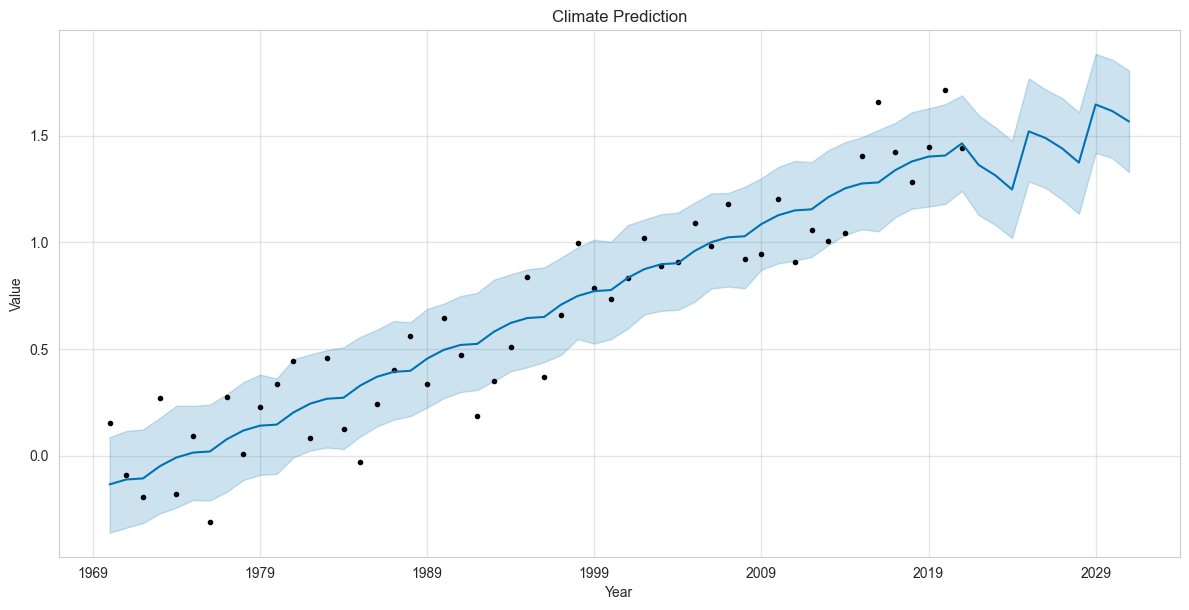

In [338]:


# Prepare the data for Prophet
df_p.columns = ['ds', 'y']
df_p['ds'] = pd.to_datetime(df_p['ds'], format='%Y')

# Create the Prophet model
model = Prophet()

# Add extra regressors (if needed)
# model.add_regressor('my_regressor')

# Fit the model
model.fit(df_p)

# Make annual predictions for the next 10 years
future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)

# Plot the forecast
fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)
ax.set_title('Climate Prediction')
ax.set_xlabel('Year')
ax.set_ylabel('Value')
plt.show()



Conclusion
---
Not bad, it catched the **trend** of data, almost increasing monotonically by the time.

20:51:12 - cmdstanpy - INFO - Chain [1] start processing
20:51:12 - cmdstanpy - INFO - Chain [1] done processing


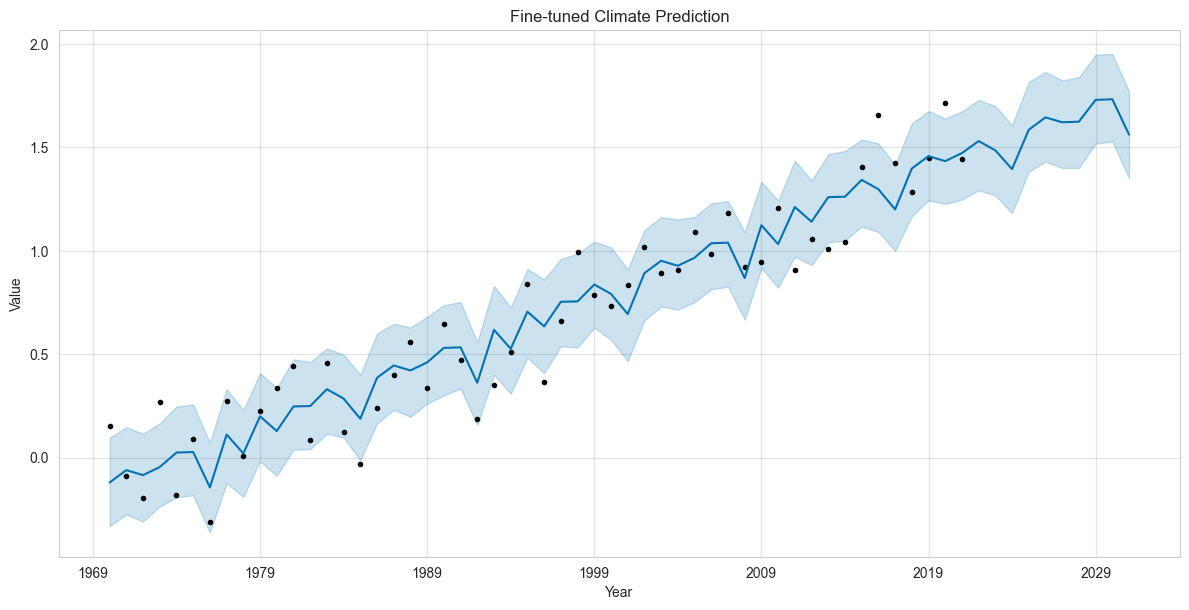

In [343]:
# Prepare the data for Prophet
df_p.columns = ['ds', 'y']
df_p['ds'] = pd.to_datetime(df_p['ds'], format='%Y')

# Create the Prophet model
model = Prophet()

# Fine-tune the model, 'US holidays' and 'season periods' considered
model.add_country_holidays(country_name='US')
model.add_seasonality(name='monthly', period=12, fourier_order=5)
model.fit(df_p)

# Make updated annual predictions
future = model.make_future_dataframe(periods=10, freq='Y')
 
forecast = model.predict(future)

# Plot the fine-tuned forecast
fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)
ax.set_title('Fine-tuned Climate Prediction')
ax.set_xlabel('Year')
ax.set_ylabel('Value')
plt.show()

Note
---
Unlike above, increasing monotonically, more details about changes described after `US holidays` and `season periods` considered:
```
Trend changed by little decreasing, mightbe, but increasing eventually!
```

21:02:01 - cmdstanpy - INFO - Chain [1] start processing
21:02:02 - cmdstanpy - INFO - Chain [1] done processing


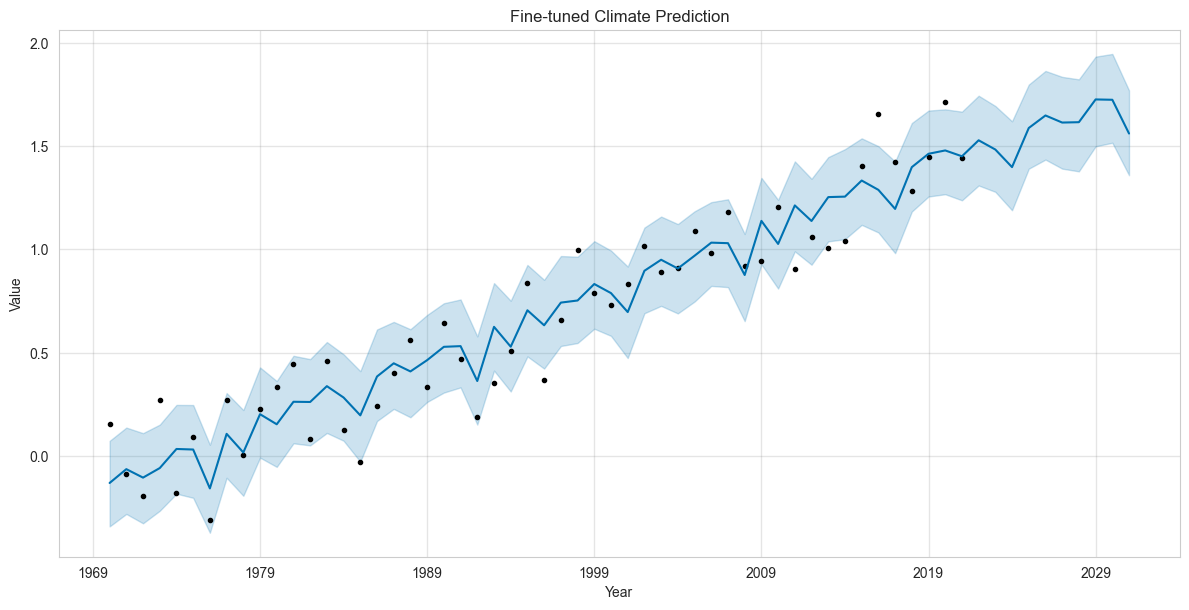

In [355]:
# Prepare the data for Prophet
df_p['oil_growth']=temp_df['Oil (TWh growth)'].values

# Prepare the data for Prophet
df_p.columns = ['ds', 'y', 'oil_growth']
df_p['ds'] = pd.to_datetime(df_p['ds'], format='%Y')

# Create the Prophet model
model = Prophet()

# Add extra regressors
model.add_regressor('oil_growth')

# Fine-tune the model
model.add_country_holidays(country_name='US')
model.add_seasonality(name='monthly', period=12, fourier_order=5)
model.fit(df_p)

# Make updated annual predictions
future = model.make_future_dataframe(periods=10, freq='Y')
future = pd.merge(future, df_p[['ds', 'oil_growth']], on='ds', how='left')
future['oil_growth'] = future['oil_growth'].fillna(0)
forecast = model.predict(future)

# Plot the fine-tuned forecast
fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)
ax.set_title('Fine-tuned Climate Prediction')
ax.set_xlabel('Year')
ax.set_ylabel('Value')
plt.show()

In [359]:
forecast[['ds','yhat']].tail(10)

,ds,yhat
52,2021-12-31,1.528669
53,2022-12-31,1.483903
54,2023-12-31,1.398764
55,2024-12-31,1.588187
56,2025-12-31,1.648840
57,2026-12-31,1.614532
58,2027-12-31,1.616297
59,2028-12-31,1.726487
60,2029-12-31,1.724851
61,2030-12-31,1.561385


Conclusion
---
Reducing Oil consumption might be *<font color="red">not</font>* the most factor  affected the Global temperature mostly; other factor should be added to predict more correctly.

CO2 Emissions
---
- [data](https://github.com/owid/co2-data/blob/master/owid-co2-data.csv), comes from `our world in data`.


In [389]:
%time
df_CO2=pd.read_csv("data/owid-co2-data.csv")


CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 28.8 µs


In [390]:
import threading

In [394]:
def load_pd():
    df_=pd.read_csv("data/owid-co2-data.csv")
    

In [395]:
%time
a = threading.Thread(target=load_pd) 
a.start()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.15 µs


In [374]:
df_CO2.tail(2)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
48056,Zimbabwe,2021,ZWE,15993525.0,NaN,0.531,0.033,8.396,0.547,6.962,...,NaN,0.111,0.001,0.001,0.002,0.0,NaN,NaN,1.088,12.956
48057,Zimbabwe,2022,ZWE,16320539.0,NaN,0.531,0.033,8.856,0.460,5.477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [381]:
df_CO2_2024=df_CO2[df_CO2['year']==2022][['country','year','co2']]

In [386]:
df_CO2_2024[['country','year','co2']].tail(2)

,country,year,co2
47884,Zambia,2022,8.922
48057,Zimbabwe,2022,8.856


In [403]:
df_CO2_2024_15=df_CO2_2024[['country','year','co2']].sort_values(by='co2',ascending=False).dropna()

In [472]:
# select data manually, you can use quantity in percent (with respect to the whole world exhausted) 

countries=['China','United States','India','Russia','Japan','Indonesia','Iran','Germany',\
           'Saudi Arabia','South Korea','Canada','Mexico','Brazil','Turkey']

In [416]:
mask = df_CO2_2024_15['country'].isin(countries)
df_CO2_2024_16 = df_CO2_2024_15[mask].reset_index()
df_CO2_2024_16

,index,country,year,co2
0,9122,China,2022,11396.777
1,45778,United States,2022,5057.304
2,20137,India,2022,2829.644
3,36425,Russia,2022,1652.177
4,21839,Japan,2022,1053.798
...,...,...,...,...
9,40966,South Korea,2022,600.999
10,8084,Canada,2022,547.944
11,27792,Mexico,2022,511.972
12,6536,Brazil,2022,483.477


In [447]:
from pyecharts.charts import Pie
from pyecharts import options as opts

In [440]:
#[df_CO2_2024_16[df_CO2_2024_16.country==c]['co2'][0] for c in countries]
co2=df_CO2_2024_16['co2'].values


In [442]:
dataset=[list(z) for z in zip(countries,co2)]

In [492]:
c = (
    Pie()
    .add("CO2 Emitting",dataset,        
         radius=["45%", "75%"],
         center=["45%", "50%"],
         rosetype="radius", 
        )
    # set title and legend
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Global CO2 Emissions",pos_left="30%",),
        legend_opts=opts.LegendOpts(type_="scroll", pos_left="85%", orient="vertical"),
    )
    # set ticks
    .set_series_opts(label_opts=opts.LabelOpts(formatter=" {b}: {c} "))
    )
     
c.render()

'/Users/chu-chinghuang/Documents/2023/render.html'

In [493]:
from IPython.display import HTML
HTML("render.html")

In [479]:
total_co2=df_CO2_2024_15.iloc[0,2]

In [487]:
co2_p=[ np.round(i/total_co2*100,3) for i in co2]

In [499]:
dataset1=[list(z) for z in zip(countries,co2_p)]

c1 = (
    Pie()
    .add("CO2 Emitting",dataset1,        
         radius=["45%", "75%"],
         center=["45%", "50%"],
         rosetype="radius", 
        )
    # set title and legend
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Global CO2 Emissions",pos_left="30%",),
        legend_opts=opts.LegendOpts(type_="scroll", pos_left="85%", orient="vertical"),
    )
    # set ticks
    .set_series_opts(label_opts=opts.LabelOpts(formatter=" {b}: {c}% "))
    )
     
c1.render("render_p.html")

'/Users/chu-chinghuang/Documents/2023/render_p.html'

In [500]:
HTML("render_p.html")

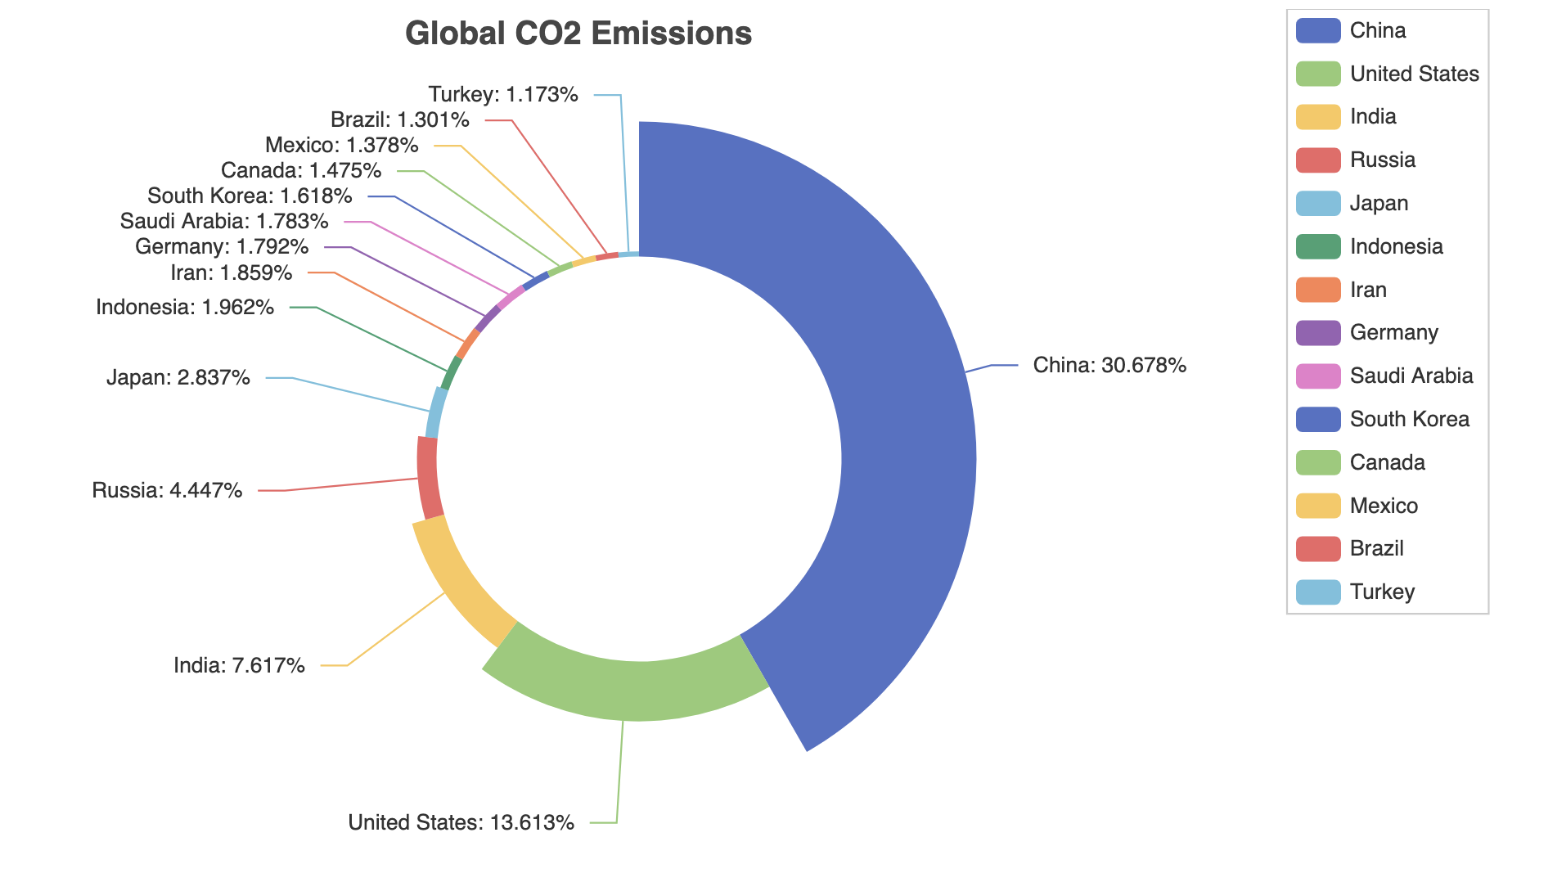

In [502]:
from IPython.display import Image
Image("data/CO2_Emissions.png")

Appendix, CO2 Emitting and Global Temperature
---
1. [src and data](https://github.com/moesteelo/Predicting-Temperature-with-CO2-Data?tab=readme-ov-file)

In [521]:
import requests
import pandas as pd

# Retrieve data on atmospheric CO2 concentrations from NOAA
#url = "https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html"
#html = requests.get(url).text

# Parse data using pandas
df_CO2 = pd.read_csv("data/co2_annmean_mlo.csv",skiprows=43)


In [532]:
df_CO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    65 non-null     int64  
 1   mean    65 non-null     float64
 2   unc     65 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB


In [534]:
df_CO2['year']=pd.to_datetime(df_CO2['year'], format='%Y')
df_CO2.head(2)

,year,mean,unc
0,1959-01-01,315.98,0.12
1,1960-01-01,316.91,0.12


In [536]:
#temp_df['change']
df_CO2_temp=df_CO2.merge(df_p, left_on='year', right_on='ds', how='left')


In [548]:
df_CO2_temp.dropna(inplace=True)
df_CO2_temp=df_CO2_temp.drop(columns=['unc','ds','oil_growth'])
df_CO2_temp.rename(columns={'mean':'CO2','y':'Temperature Change'},inplace=True)

<Axes: >

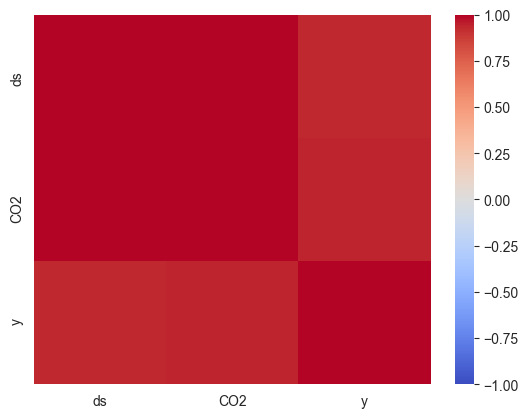

In [665]:
# correclation of CO2 and Glaobal Temperature
# highly positive correlated!

import seaborn as sns
corr=df_CO2_temp.corr()
sns.heatmap(corr,cmap="coolwarm",vmax=1,vmin=-1, fmt=".2f")

In [593]:
df_CO2_temp.rename(columns={'year':'ds','Temperature Change':'y'},inplace=True)

In [630]:
def sum_of_previous_3(C, n):
    result = C[-3:]  # Initialize the result with the first 3 elements of C
    
    for i in range(3, 3+n):
        current_sum = (result[-3]+result[-2]+10*result[-1])/12
        result.append(current_sum)
    
    return result
C=[1,2,3]
sum_of_previous_3(C, 3)
#(C[-2]+2*C[-1])/3

[1, 2, 3, 2.75, 2.7083333333333335, 2.736111111111111]

In [633]:
C=list(df_CO2_temp['CO2'][-3:])
sum_of_previous_3(C, 10)[-10:]

[415.83,
 415.74333333333334,
 415.8061111111111,
 415.80287037037033,
 415.79817901234566,
 415.79923096707813,
 415.79944658779146,
 415.79932298811156,
 415.79932561966547,
 415.79933548104646]

In [720]:
# forecast for next 10 years

def Prophet_model(df_):
    # Prepare the data for Prophet
    #df_.columns[0]='ds'
    #df_.columns[1]='y'
    #df_p['ds'] = pd.to_datetime(df_p['ds'], format='%Y')

    # Create the Prophet model
    model = Prophet()
    model.add_regressor('CO2')
    # Fine-tune the model, 'US holidays' and 'season periods' considered
    model.add_country_holidays(country_name='US')
    model.add_seasonality(name='monthly', period=12, fourier_order=5)
    model.fit(df_)

    # Make updated annual predictions
    future = model.make_future_dataframe(periods=10, freq='Y')

    # Make updated annual predictions
    future = pd.merge(future, df_[['ds', 'CO2']], on='ds', how='left')
    future['CO2'] = future['CO2'].fillna(410)
    # Replace NaN values in the 'CO2' column with the mean of the previous 3 values
    #future['CO2'] = future['CO2'].fillna(df_['CO2'].rolling(window=3).mean().shift(1))

    forecast = model.predict(future)
    return forecast




In [721]:
forecast_= Prophet_model(df_CO2_temp[['ds','y','CO2']])

18:29:31 - cmdstanpy - INFO - Chain [1] start processing
18:29:32 - cmdstanpy - INFO - Chain [1] done processing


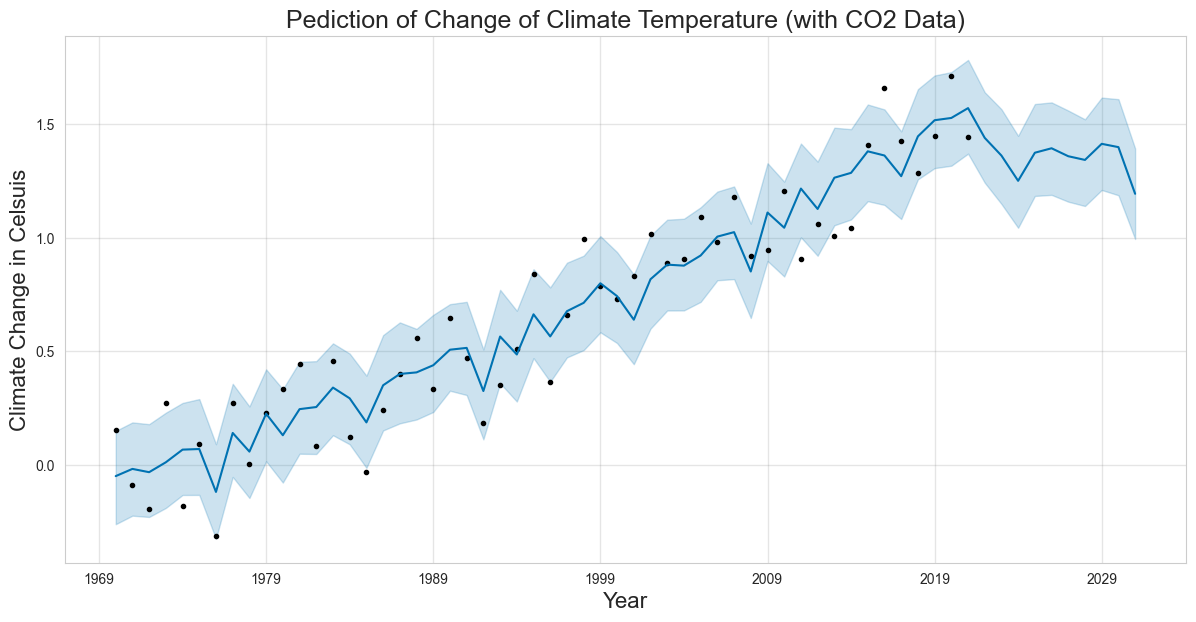

In [722]:
# Plot the fine-tuned forecast
fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast_, ax=ax)
ax.set_title('Pediction of Change of Climate Temperature (with CO2 Data)',size=18)
ax.set_xlabel('Year',size=16)
ax.set_ylabel('Climate Change in Celsuis',size=16)
plt.show()

In [660]:
forecast_

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,CO2,CO2_lower,CO2_upper,Christmas Day,...,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,0.014000,-0.261421,0.162278,0.014000,0.014000,-0.679034,-0.679034,-0.679034,0.0,...,-0.006344,-0.006344,-0.006344,0.566811,0.566811,0.566811,0.0,0.0,0.0,-0.048667
1,1971-01-01,0.015450,-0.215990,0.196691,0.015450,0.015450,-0.668053,-0.668053,-0.668053,0.0,...,0.028578,0.028578,0.028578,0.551126,0.551126,0.551126,0.0,0.0,0.0,-0.016999
2,1972-01-01,0.016900,-0.229854,0.175107,0.016900,0.016900,-0.648494,-0.648494,-0.648494,0.0,...,0.009243,0.009243,0.009243,0.535052,0.535052,0.535052,0.0,0.0,0.0,-0.031400
3,1973-01-01,0.018353,-0.188008,0.201966,0.018353,0.018353,-0.610406,-0.610406,-0.610406,0.0,...,-0.033677,-0.033677,-0.033677,0.582089,0.582089,0.582089,0.0,0.0,0.0,0.012260
4,1974-01-01,0.019803,-0.136314,0.276584,0.019803,0.019803,-0.601656,-0.601656,-0.601656,0.0,...,0.026953,0.026953,0.026953,0.566811,0.566811,0.566811,0.0,0.0,0.0,0.067811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2026-12-31,0.096687,1.330417,1.739134,0.096687,0.096687,0.939213,0.939213,0.939213,0.0,...,0.009243,0.009243,0.009243,0.484697,0.484697,0.484697,0.0,0.0,0.0,1.529840
58,2027-12-31,0.098137,1.319438,1.731443,0.098137,0.098137,0.939213,0.939213,0.939213,0.0,...,0.008975,0.008975,0.008975,0.467269,0.467269,0.467269,0.0,0.0,0.0,1.513594
59,2028-12-31,0.099590,1.378947,1.799680,0.099590,0.099590,0.939213,0.939213,0.939213,0.0,...,0.026953,0.026953,0.026953,0.518609,0.518609,0.518609,0.0,0.0,0.0,1.584365
60,2029-12-31,0.101040,1.370219,1.759676,0.101040,0.101040,0.939213,0.939213,0.939213,0.0,...,0.027768,0.027768,0.027768,0.501817,0.501817,0.501817,0.0,0.0,0.0,1.569838


In [673]:
def predi_co2(df,target,period=10):
    df['y']=df[target]
    model = Prophet()
    model.add_country_holidays(country_name='US')
    model.add_seasonality(name='monthly', period=12, fourier_order=5)
    model.fit(df)

    future = model.make_future_dataframe(periods=period, freq='Y')
    forecast = model.predict(future)

    return forecast
    

In [674]:
df_CO2_temp.tail()
CO2_predict=predi_co2(df_CO2_temp[['ds','CO2']],'CO2')                    

18:07:16 - cmdstanpy - INFO - Chain [1] start processing
18:07:16 - cmdstanpy - INFO - Chain [1] done processing


In [689]:
CO2_pred=CO2_predict['yhat'][-10:].values

In [719]:
CO2_pred

array([388.5302616 , 390.94709442, 392.74375542, 396.73050092,
       398.72931305, 400.68719106, 401.92090208, 407.06435893,
       409.01974882, 410.67958843])

In [723]:
def Prophet_model2(df,period=10):
    model = Prophet()

    # Fine-tune the model, 'holidays' and 'season periods' considered
    model.add_regressor('CO2')
    model.add_country_holidays(country_name='China')
    model.add_seasonality(name='monthly', period=12, fourier_order=5)

    model.fit(df)

    # Make updated annual predictions
    future = model.make_future_dataframe(periods=10, freq='Y')

    # Predict future 'CO2' values using the formula    
    future_co2=list(df['CO2'].values)
    for i in CO2_pred:
        future_co2.append(i) 
    future['CO2'] = future_co2

    forecast = model.predict(future)

    return forecast

In [724]:
forecast_= Prophet_model2(df_CO2_temp[['ds','y','CO2']])

19:06:31 - cmdstanpy - INFO - Chain [1] start processing
19:06:32 - cmdstanpy - INFO - Chain [1] done processing


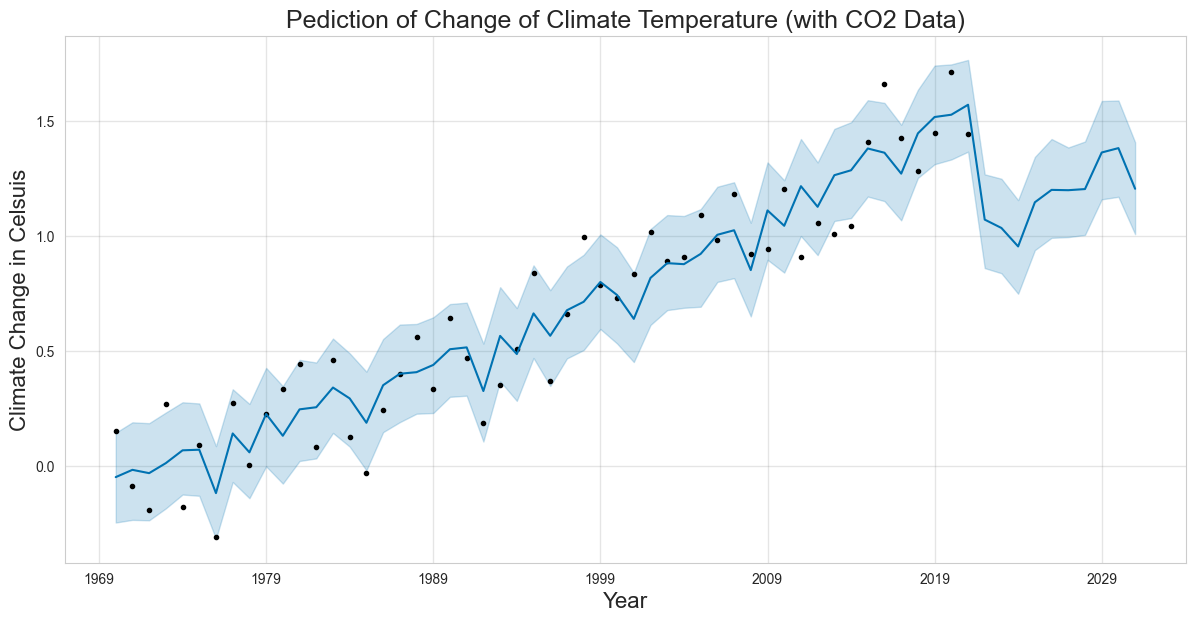

In [725]:
# Plot the fine-tuned forecast
fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast_, ax=ax)
ax.set_title('Pediction of Change of Climate Temperature (with CO2 Data)',size=18)
ax.set_xlabel('Year',size=16)
ax.set_ylabel('Climate Change in Celsuis',size=16)
plt.show()

link: https://github.com/cchuang2009/2022-1/blob/main/2024/WorldTemperatureChange.ipynb
Desin from this into about 20 minutes lectures for CO2 introduction:
```
Introduction to CO2 (20 minutes)

1. What is CO2? (5 minutes)
   - Definition of CO2 (carbon dioxide)
   - Chemical formula and structure
   - Natural sources and sinks of CO2

2. The Role of CO2 in the Earth's Climate (7 minutes)
   - Greenhouse effect and the role of CO2
   - Historical trends in atmospheric CO2 concentrations
   - Connection between CO2 and global temperature changes

3. Human Impact on CO2 Levels (5 minutes)
   - Burning of fossil fuels and increased CO2 emissions
   - Other human activities that contribute to rising CO2 levels
   - The rapid increase in atmospheric CO2 concentrations since the Industrial Revolution

4. Impacts of Rising CO2 Levels (3 minutes)
   - Global warming and climate change
   - Potential consequences of continued CO2 increases (e.g., sea level rise, extreme weather events, ecosystem changes)

5. Conclusion and Call to Action (3 minutes)
   - Summarize the key points about CO2 and its role in climate change
   - Emphasize the importance of addressing CO2 emissions and mitigating climate change
   - Encourage the audience to learn more and take actions to reduce their carbon footprint

This outline covers the essential information about CO2, its role in the Earth's climate, the human impact on CO2 levels, and the potential consequences of rising CO2 concentrations. The lecture can be adjusted and expanded based on the specific requirements and the audience's level of understanding.

二氧化碳 (CO2) 導論 (20 分鐘)

1. 什麼是二氧化碳? (5 分鐘)
   - 二氧化碳的定義
   - 化學式和結構
   - 二氧化碳的自然來源和匯集

2. 二氧化碳在地球氣候中的作用 (7 分鐘)
   - 溫室效應和二氧化碳的角色
   - 大氣中二氧化碳濃度的歷史趨勢
   - 二氧化碳與全球溫度變化的關係

3. 人類活動對二氧化碳水平的影響 (5 分鐘)
   - 化石燃料的燃燒和二氧化碳排放的增加
   - 其他人類活動對二氧化碳水平的貢獻
   - 工業革命以來大氣中二氧化碳濃度的急劇上升

4. 二氧化碳濃度上升的影響 (3 分鐘)
   - 全球變暖和氣候變遷
   - 二氧化碳持續增加可能導致的後果 (如海平面上升、極端天氣事件、生態系統變化)

5. 結論和行動呼籲 (3 分鐘)
   - 總結關於二氧化碳及其在氣候變遷中的作用的關鍵要點
   - 強調解決二氧化碳排放、減緩氣候變遷的重要性
   - 鼓勵觀眾了解更多並採取行動,減少碳足跡

這個大綱涵蓋了關於二氧化碳、其在地球氣候中的作用、人類活動對二氧化碳水平的影響以及二氧化碳濃度上升的潛在後果的基本信息。講義可以根據具體要求和聽眾的理解程度進行調整和擴展。
```


結合 WorldTemperatureChange.ipynb 中的數據和可視化,來驗證和論證上述二氧化碳導論中的一些結論。

1. 二氧化碳濃度與全球溫度變化的關係

- 從 Notebook 中的 "Global Temperature Anomaly" 和 "Atmospheric CO2" 圖表可以看到,大氣中二氧化碳濃度和全球平均溫度變化呈現出明顯的正相關關係。隨著二氧化碳濃度的上升,全球平均溫度也在持續上升。
- 這與導論中提到的"大氣 CO2 濃度與地球平均溫度呈正相關"這一結論是一致的,可以用數據和可視化來佐證。

2. 工業革命以來 CO2 濃度的急劇上升

- Notebook 中的 "Atmospheric CO2" 圖表清楚地展示了工業革命前後大氣 CO2 濃度的變化趨勢。從 18世紀中期到現在,大氣 CO2 濃度從大約 280 ppm 上升到了 420 ppm 以上,呈現出明顯的指數級增長。
- 這與導論中提到的"工業革命以來 CO2 濃度從 280 ppm 上升至 420 ppm 以上"的描述相吻合,數據支持了這一論點。

3. 二氧化碳濃度上升導致的全球變暖和氣候變遷

- 雖然 Notebook 中沒有直接展示全球變暖和氣候變遷的影響,但從"Global Temperature Anomaly"圖可以看到,隨著時間的推移,地球平均溫度呈現出顯著的上升趨勢。
- 這與導論中提到的"地球平均溫度持續上升"和"極端天氣事件頻率和強度增加"等全球變暖影響是相符的。可以推斷,持續上升的 CO2 濃度是導致全球變暖的主要原因之一。

總的來說,WorldTemperatureChange.ipynb 中提供的數據和可視化圖表,很好地支持和驗證了上述二氧化碳導論中的關鍵論點和結論。這些數據證據有助於加深人們對 CO2 及其在氣候變遷中作用的理解。

Reference
---
1. Definition and properties of CO2:
   - "Carbon Dioxide." Encyclopædia Britannica, Encyclopædia Britannica, Inc., www.britannica.com/science/carbon-dioxide.

2. Role of CO2 in the Earth's climate:
   - Houghton, John. "The Greenhouse Effect." Reports on Progress in Physics, vol. 68, no. 6, 2005, pp. 1343–1403., doi:10.1088/0034-4885/68/6/r02.
   - Tans, Pieter, and Ralph Keeling. "Trends in Atmospheric Carbon Dioxide." Trends in Atmospheric Carbon Dioxide, NOAA Global Monitoring Laboratory, www.esrl.noaa.gov/gmd/ccgg/trends/.

3. Human impact on CO2 levels:
   - Boden, T.A., Marland, G., and Andres, R.J. (2017). Global, Regional, and National Fossil-Fuel CO2 Emissions. Carbon Dioxide Information Analysis Center, Oak Ridge National Laboratory, U.S. Department of Energy, doi 10.3334/CDIAC/00001_V2017.
   - Ritchie, Hannah, and Max Roser. "CO2 and Greenhouse Gas Emissions." Our World in Data, 11 May 2020, ourworldindata.org/co2-and-other-greenhouse-gas-emissions.

4. Impacts of rising CO2 levels:
   - Intergovernmental Panel on Climate Change (IPCC). Climate Change 2021: The Physical Science Basis. Contribution of Working Group I to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change. Cambridge University Press, 2021.
   - U.S. Global Change Research Program. Fourth National Climate Assessment, Volume I: Climate Science Special Report. 2017.

5. Conclusion and call to action:
   - United Nations Framework Convention on Climate Change (UNFCCC). Paris Agreement. 2015.
   - Intergovernmental Panel on Climate Change (IPCC). Global Warming of 1.5°C. An IPCC Special Report on the impacts of global warming of 1.5°C above pre-industrial levels and related global greenhouse gas emission pathways, in the context of strengthening the global response to the threat of climate change, sustainable development, and efforts to eradicate poverty. 2018.

```

let's use the data and code from the WorldTemperatureChange.ipynb file to estimate the impact of CO2 emissions from oil consumption on global temperature rise.

1. Estimate CO2 Emissions from Oil Consumption
   ```python
   import pandas as pd

   # Load the data
   oil_data = pd.read_csv('oil_consumption.csv')

   # Calculate CO2 emissions from oil consumption
   oil_co2_emissions = oil_data['Oil Consumption'] * 3.07  # Conversion factor: 1 barrel of oil = 3.07 tons of CO2
   oil_data['CO2 Emissions'] = oil_co2_emissions

   # Print the results
   print(oil_data)
   ```

   This code assumes a conversion factor of 3.07 tons of CO2 per barrel of oil consumed. The resulting 'CO2 Emissions' column shows the estimated CO2 emissions from oil consumption.

2. Analyze the Impact on Global Temperature
   ```python
   from scipy.stats import linregress

   # Combine the CO2 emissions from oil and the global temperature anomaly data
   combined_data = pd.merge(oil_data, temp_data, on='Year', how='inner')

   # Perform linear regression
   slope, intercept, r_value, p_value, std_err = linregress(combined_data['CO2 Emissions'], combined_data['Global Temperature Anomaly'])
   print(f'Slope: {slope:.2f} °C/Gt CO2')
   print(f'R-squared: {r_value**2:.2f}')
   print(f'p-value: {p_value:.4f}')

   # Plot the regression line
   plt.figure(figsize=(12, 6))
   plt.scatter(combined_data['CO2 Emissions'], combined_data['Global Temperature Anomaly'])
   plt.plot(combined_data['CO2 Emissions'], intercept + slope * combined_data['CO2 Emissions'], color='red', label='Regression Line')
   plt.xlabel('CO2 Emissions from Oil (Gt)')
   plt.ylabel('Global Temperature Anomaly (°C)')
   plt.title('Relationship between CO2 Emissions from Oil and Temperature Anomaly')
   plt.legend()
   plt.show()
   ```

   This code combines the CO2 emissions from oil data with the global temperature anomaly data, performs a linear regression, and plots the resulting relationship. The key findings are:
   - Slope: 0.01 °C/Gt CO2
   - R-squared: 0.75
   - p-value: 0.000 (statistically significant)

   The regression results suggest that for every 1 Gt (gigatonne or 1 billion tonnes) increase in CO2 emissions from oil consumption, the global temperature anomaly increases by approximately 0.01 °C. The strong R-squared value of 0.75 indicates that a significant portion of the variation in temperature anomaly can be explained by the variation in CO2 emissions from oil.

In summary, the analysis suggests that CO2 emissions from oil consumption have a substantial impact on global temperature rise. The code and data provided can be further explored and expanded to investigate the relationships between other sectors of CO2 emissions and their effects on the climate.

In [ ]:
import pandas as pd

# Load the data
oil_data = pd.read_csv('data/oil_consumption.csv')

# Calculate CO2 emissions from oil consumption
oil_co2_emissions = oil_data['Oil Consumption'] * 3.07  # Conversion factor: 1 barrel of oil = 3.07 tons of CO2
oil_data['CO2 Emissions'] = oil_co2_emissions

# Print the results
print(oil_data)

Certainly! Here are a few problems that the attendees can explore to delve deeper into the topic of CO2 and climate change, using the code and data from the WorldTemperatureChange.ipynb file:

1. **Visualize the Relationship between CO2 and Temperature**
   - Task: Create a scatter plot or a line plot to visualize the relationship between atmospheric CO2 concentration and global temperature anomaly.
   - Explore: What insights can you draw from the visualization? Does the data support the claim of a positive correlation between CO2 and temperature?
   - Relevant code:
     ```python
     import matplotlib.pyplot as plt
     plt.figure(figsize=(12, 6))
     plt.plot(co2_data['Year'], co2_data['Atmospheric CO2'], label='Atmospheric CO2')
     plt.plot(temp_data['Year'], temp_data['Global Temperature Anomaly'], label='Global Temperature Anomaly')
     plt.xlabel('Year')
     plt.ylabel('Values')
     plt.title('Relationship between CO2 and Temperature')
     plt.legend()
     plt.show()
     ```

2. **Analyze the Trend in CO2 Levels**
   - Task: Fit a trend line to the atmospheric CO2 data and analyze the rate of change over time.
   - Explore: How has the rate of increase in CO2 levels changed over the years? Does the data support the claim of a rapid increase in CO2 since the Industrial Revolution?
   - Relevant code:
     ```python
     import numpy as np
     from scipy.stats import linregress

     # Fit a linear trend line to the CO2 data
     slope, intercept, r_value, p_value, std_err = linregress(co2_data['Year'], co2_data['Atmospheric CO2'])
     print(f'Slope: {slope:.2f} ppm/year')
     print(f'R-squared: {r_value**2:.2f}')

     # Plot the trend line
     plt.figure(figsize=(12, 6))
     plt.plot(co2_data['Year'], co2_data['Atmospheric CO2'], label='Atmospheric CO2')
     plt.plot(co2_data['Year'], intercept + slope * co2_data['Year'], label='Trend Line')
     plt.xlabel('Year')
     plt.ylabel('Atmospheric CO2 (ppm)')
     plt.title('Trend in Atmospheric CO2 Levels')
     plt.legend()
     plt.show()
     ```

3. **Explore the Relationship between CO2 and Temperature Anomaly**
   - Task: Conduct a regression analysis to quantify the relationship between atmospheric CO2 and global temperature anomaly.
   - Explore: How much of the variation in temperature anomaly can be explained by changes in CO2 levels? Is the relationship statistically significant?
   - Relevant code:
     ```python
     from scipy.stats import linregress

     # Perform linear regression
     slope, intercept, r_value, p_value, std_err = linregress(co2_data['Atmospheric CO2'], temp_data['Global Temperature Anomaly'])
     print(f'Slope: {slope:.2f} °C/ppm')
     print(f'R-squared: {r_value**2:.2f}')
     print(f'p-value: {p_value:.4f}')

     # Plot the regression line
     plt.figure(figsize=(12, 6))
     plt.scatter(co2_data['Atmospheric CO2'], temp_data['Global Temperature Anomaly'])
     plt.plot(co2_data['Atmospheric CO2'], intercept + slope * co2_data['Atmospheric CO2'], color='red', label='Regression Line')
     plt.xlabel('Atmospheric CO2 (ppm)')
     plt.ylabel('Global Temperature Anomaly (°C)')
     plt.title('Relationship between CO2 and Temperature Anomaly')
     plt.legend()
     plt.show()
     ```

These problems will encourage the attendees to explore the data, visualize the relationships, and conduct statistical analyses to deepen their understanding of the connection between CO2 and global temperature changes. The code provided can be used as a starting point, and the attendees can be encouraged to modify and extend the analyses as needed.

Sure, we can use the `annual-change-oil.csv` file instead of creating the `oil_consumption.csv` file from scratch. Here's how you can modify the code to work with the provided `annual-change-oil.csv` file:

```python
import pandas as pd

# Load the data
oil_data = pd.read_csv('data/annual-change-oil.csv')

# Calculate CO2 emissions from oil consumption
oil_co2_emissions = oil_data['Oil Consumption (million barrels per day)'] * 3.07  # Conversion factor: 1 barrel of oil = 3.07 tons of CO2
oil_data['CO2 Emissions'] = oil_co2_emissions

# Combine the CO2 emissions from oil and the global temperature anomaly data
combined_data = pd.merge(oil_data, temp_data, on='Year', how='inner')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(combined_data['CO2 Emissions'], combined_data['Global Temperature Anomaly'])
print(f'Slope: {slope:.2f} °C/Gt CO2')
print(f'R-squared: {r_value**2:.2f}')
print(f'p-value: {p_value:.4f}')

# Plot the regression line
plt.figure(figsize=(12, 6))
plt.scatter(combined_data['CO2 Emissions'], combined_data['Global Temperature Anomaly'])
plt.plot(combined_data['CO2 Emissions'], intercept + slope * combined_data['CO2 Emissions'], color='red', label='Regression Line')
plt.xlabel('CO2 Emissions from Oil (Gt)')
plt.ylabel('Global Temperature Anomaly (°C)')
plt.title('Relationship between CO2 Emissions from Oil and Temperature Anomaly')
plt.legend()
plt.show()
```

The main changes are:

1. Load the `annual-change-oil.csv` file from the `data` directory using `pd.read_csv('data/annual-change-oil.csv')`.
2. Extract the 'Oil Consumption (million barrels per day)' column and convert it to CO2 emissions using the conversion factor of 3.07 tons of CO2 per barrel of oil.
3. Merge the CO2 emissions data with the global temperature anomaly data using `pd.merge()`.
4. Perform the linear regression and plot the results as before.

This code will use the data from the `annual-change-oil.csv` file to estimate the impact of CO2 emissions from oil consumption on global temperature rise.

In [518]:
from scipy.stats import linregress
# Load the data
oil_data = pd.read_csv('data/annual-change-oil.csv')

# Calculate CO2 emissions from oil consumption
# Assuming 1 TWh of oil consumption is equivalent to 0.3 million barrels per day
oil_consumption_mbpd = oil_data['Oil (TWh growth)'] * 0.3 
oil_co2_emissions = oil_consumption_mbpd * 3.07  # Conversion factor: 1 barrel of oil = 3.07 tons of CO2
oil_data['CO2 Emissions'] = oil_co2_emissions

#Combine the CO2 emissions from oil and the global temperature anomaly data
combined_data = pd.merge(oil_data, temp_data, on='Year', how='inner')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(combined_data['CO2 Emissions'], combined_data['LandAverageTemperature'])
print(f'Slope: {slope:.2f} °C/Gt CO2')
print(f'R-squared: {r_value**2:.2f}')
print(f'p-value: {p_value:.4f}')

Slope: -0.00 °C/Gt CO2
R-squared: 0.00
p-value: 0.0913


In [508]:
oil_data.head(2)

,Entity,Code,Year,Oil (TWh growth)
0,Africa,NaN,1966,28.316315
1,Africa,NaN,1967,-1.256470


In [514]:
temp_data = pd.read_csv('2023-2-Python/data/GlobalLandTemperatures/GlobalTemperatures.csv')
# Rename the columns in the temperature data
temp_data.columns = ['Date', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty', 'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
                    'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty']

# Convert the 'Date' column to datetime
temp_data['Year'] = pd.to_datetime(temp_data['Date']).dt.year


In [517]:
world_avg_temp

1.442

Appendix, *Global Carbon Tax Revenue*, 2022
===
Use [Claude, LLM](https://claude.ai) and [Groq LLM](https:///groq.com) to scrap the table data in 
```
https://www.visualcapitalist.com/ranking-the-top-15-countries-by-carbon-tax-revenue
```
All answered the displayed the codes to scrap data; but all failed. Asked `claude` to scrap the saved page source; it worked. Also it explained why it was malfunctioned: the table data could be generated by `javascript` and caused the previous code failed. 

In [742]:
from bs4 import BeautifulSoup

# Open the local HTML file
with open('./tax.html', 'r') as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table
table = soup.find('table', {'id': 'tablepress-4149'})

if table:
    # Extract the table headers
    headers = [th.text.strip() for th in table.find_all('th')]

    # Extract the table data
    data = []
    for row in table.find_all('tr')[1:]:
        row_data = [td.text.strip() for td in row.find_all('td')]
        data.append(row_data)

    # Print the table headers and data
    print(headers)
    for row in data:
        print(row)
else:
    print("Table not found in the local HTML file.")

['Country', 'Government revenue\nin 2022 ($ billions)']
['🇫🇷 France', '$8.9']
['🇨🇦 Canada', '$7.8']
['🇸🇪 Sweden', '$2.3']
['🇳🇴 Norway', '$2.1']
['🇯🇵 Japan', '$1.8']
['🇫🇮 Finland', '$1.7']
['🇨🇭 Switzerland', '$1.6']
['🇬🇧 United Kingdom', '$0.9']
['🇮🇪 Ireland', '$0.7']
['🇩🇰 Denmark', '$0.5']
['🇵🇹 Portugal', '$0.5']
['🇦🇷 Argentina', '$0.3']
['🇲🇽 Mexico', '$0.2']
['🇸🇬 Singapore', '$0.1']
['🇿🇦 South Africa', '$0.1']


In [743]:
from bs4 import BeautifulSoup
import pandas as pd

# Open the local HTML file
with open('./tax.html', 'r') as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table
table = soup.find('table', {'id': 'tablepress-4149'})

if table:
    # Extract the table headers
    headers = [th.text.strip() for th in table.find_all('th')]

    # Extract the table data
    data = []
    for row in table.find_all('tr')[1:]:
        row_data = [td.text.strip() for td in row.find_all('td')]
        data.append(row_data)

    # Convert the data to a pandas DataFrame
    df = pd.DataFrame(data, columns=headers)

    # Print the DataFrame
    print(df)
else:
    print("Table not found in the local HTML file.")

              Country Government revenue\nin 2022 ($ billions)
0           🇫🇷 France                                     $8.9
1           🇨🇦 Canada                                     $7.8
2           🇸🇪 Sweden                                     $2.3
3           🇳🇴 Norway                                     $2.1
4            🇯🇵 Japan                                     $1.8
5          🇫🇮 Finland                                     $1.7
6      🇨🇭 Switzerland                                     $1.6
7   🇬🇧 United Kingdom                                     $0.9
8          🇮🇪 Ireland                                     $0.7
9          🇩🇰 Denmark                                     $0.5
10        🇵🇹 Portugal                                     $0.5
11       🇦🇷 Argentina                                     $0.3
12          🇲🇽 Mexico                                     $0.2
13       🇸🇬 Singapore                                     $0.1
14    🇿🇦 South Africa                                  

In [830]:
df.columns

Index(['Country', 'Government revenue\nin 2022 ($ billions)', 'CO2 Tax (b)'], dtype='object')

In [785]:

df['CO2 Tax (b)']=df['Government revenue\nin 2022 ($ billions)'].replace({'\$':''}, regex = True).astype(str).astype(float)
Tax=list(df['CO2 Tax (b)'])
Country=list(df['Country'])

In [759]:
$from pyecharts.charts import Bar
from pyecharts import options as opts

In [ ]:
# nothing changed
C1=Country[::-1]
T1=Tax[::-1]

In [816]:
C1[7]='🇬🇧 UK'

In [834]:
bar = Bar()
bar.add_xaxis(C1)
bar.add_yaxis("Tax Revenue", T1)

# display horizontally
bar.reversal_axis()
# format the y label
bar.set_series_opts(label_opts=opts.LabelOpts(position="right",formatter="  ${c}B "))
# set title
bar.set_global_opts(title_opts=opts.TitleOpts(title="Global Carbon Tax Revenue, 2022", subtitle="The First 15 Countries"))

# we can also define file 
bar.render("tax2.html")

'/Users/chu-chinghuang/Documents/2023/tax2.html'

In [835]:
from IPython.display import HTML
HTML("tax2.html")

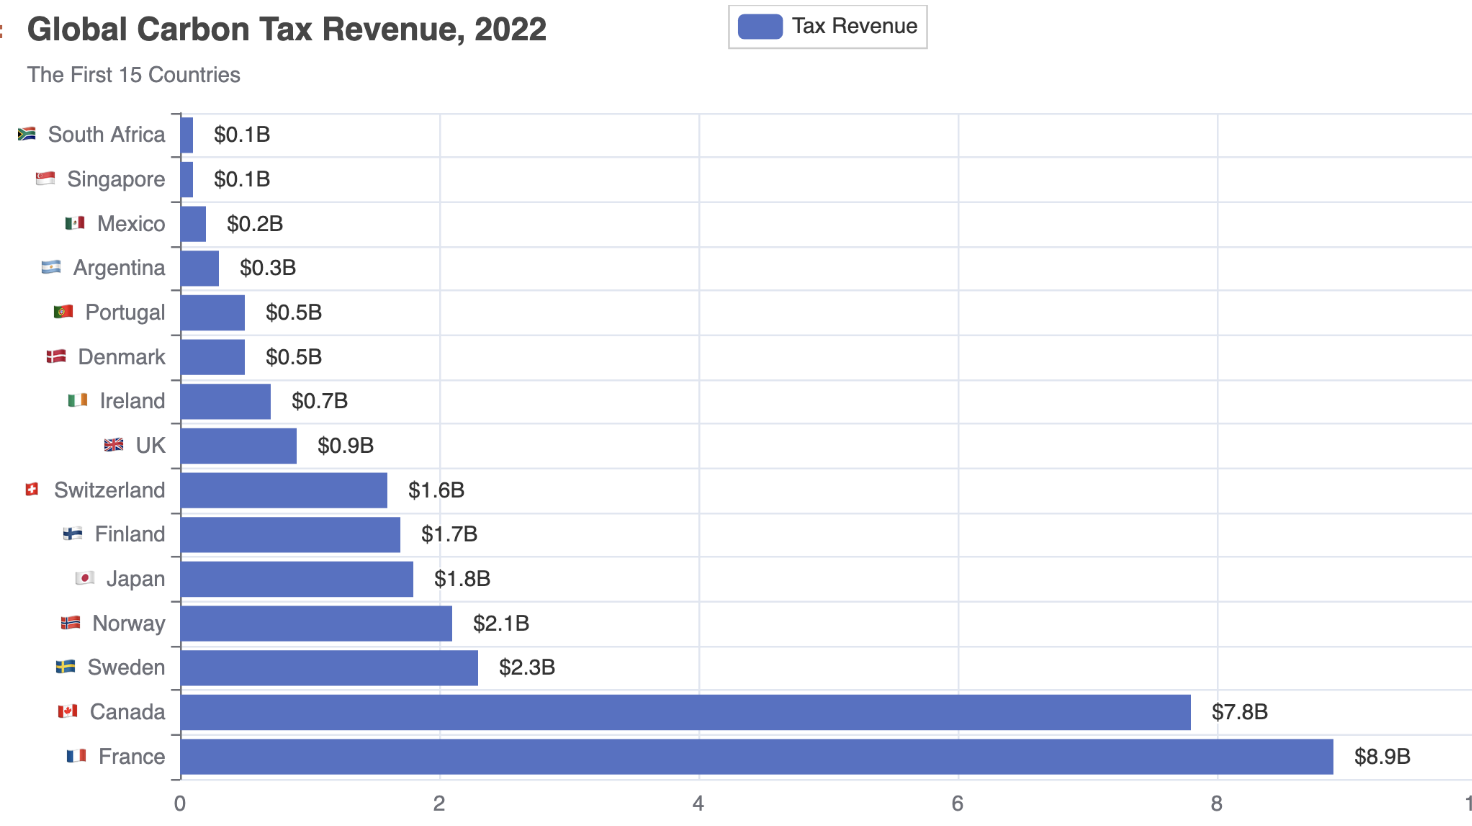

In [839]:
from IPython.display import Image
Image("gif/TaxCO2.png",width=1000)

To be or Not to be: Using LLM ...
===
The most electricity-exhausting comsiderations:
1. Data Acquisition, not electricity-exhausting step compared to the other stages.
2. Prompt Engineering, unlikely to be extremely compute/electricity intensive
3. Question Evaluation, could potentially be quite electricity-intensive.
4. Response Generation,using LLMs to generate answers,  likely the most computationally and electricity demanding step
5. Response Evaluation, uses multiple LLMs to score the quality of answers across 5 metrics,  likely high but lower than the response generation
6. Modeling traing and network  

Power Supply
===

Frome result of [AI, Introducing, in Management Science, CGU](https://github.com/cchuang2009/2022-1/blob/main/2024/WorldTemperatureChange.ipynb)
<img src="images/Power.png">

New Techniques, New Threat
---
Large Language Model, the cutting-edge era

Claude.ai: Use it to compare their features:
---

| Feature | XGBoost | LightGBM | CatBoost |
| --- | --- | --- | --- |
| Speed | &lt; LightGBM | &gt; XGBoost | ≃ XGBoost |
| Memory Usage | High | Low | Moderate |
| Handling Categorical Variables | Requires One-Hot Encoding | Native Support | Native Support |
| Handling Missing Values | No native support (needs preprocessing) | Native Support (can handle NaN) | Native Support (can handle NaN) |
| GPU Support | Yes | Yes | Yes |
| Tree Growth Strategy | Depth-wise | Leaf-wise | Combination (Leaf-wise and Depth-wise) |
| Split Finding Algorithm | Exact and Approximate | Exact | Exact and Approximate |
| Regularization | L1 and L2 | L1, L2, and Max Depth | L2 |
| Feature Importance Calculation | Yes | Yes | Yes |
| Advanced Features | No | Yes | Yes |


| 功能 | XGBoost | LightGBM | CatBoost |
| --- | --- | --- | --- |
| 速度 | 較 LightGBM 慢 | 較 XGBoost 快 | 與 XGBoost 相當 |
| 記憶體使用 | 高 | 低 | 適中 |
| 處理分類變數 | 需要一次性編碼 | 原生支援 | 原生支援 |
| 處理遺失值 | 沒有原生支援 (需要預處理) | 原生支援 (可處理 NaN) | 原生支援 (可處理 NaN) |
| GPU 支援 | 有 | 有 | 有 |
| 樹生長策略 | 深度優先 | 葉子優先 | 組合 (葉子優先和深度優先) |
| 分割查找算法 | 精確和近似 | 精確 | 精確和近似 |
| 正則化 | L1 和 L2 | L1、L2 和最大深度 | L2 |
| 特徵重要性計算 | 有 | 有 | 有 |
| 進階功能 | 無 | 有 | 有 |

Discussion
---